# Project Scope

1. Data Cleaning
2. Data Exploration
3. Evaluate Area of Interest
4. Form Predictive Model
5. Answer Formulated Questions
    - What are the 5 most influential variable contributing to the price of a property ?
    
    - Cost benefit analysis of grade & price of a property
    
    - Would it be a better investment to purchase and renovate old properties or develop a new residential area in kings county ?


### **The following glossary aims to describe the columns of data collected for this project.**

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

# Importing Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
%matplotlib inline
plt.style.use('seaborn')

house_data = pd.read_csv('kc_house_data.csv')

# Data Cleaning

First, we try to evaluate the shape of the dataframe and identify columns with missing (null) values

In [2]:
house_data.shape

(21597, 21)

In [3]:
house_data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

As displayed above, we can see there are missing values in the following columns:
* waterfront
* view
* yr_renovated

We will look into each column individually to begin our data cleaning process.

## Waterfront

In [4]:
house_data['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [5]:
house_data['waterfront'].unique()

array([nan,  0.,  1.])

As described in the glossary above, the waterfront column represents if the property has a view to a waterfront, hence the data collected were represented in boolean form:
* **0.0 = The property does not have a waterfront view**
* **1.0 = The property has a waterfront view**

However, when evaluating the unique values from the column, we noticed missing values represented by nan. As they are categorical data, we will try to fill the missing values with the mode/median value, which are both 0.0, and it is fair to assume the missing values are due to the lack of waterfront view at the listed properties.

In [6]:
waterfront_boolean = []
for i in range(0,len(house_data['waterfront'])):
    if house_data['waterfront'][i] == 0.0:
        waterfront_boolean.append(0.0)
    elif house_data['waterfront'].isna()[i] == True:
        waterfront_boolean.append(0.0)
    else:
        waterfront_boolean.append(1.0)
house_data['waterfront_bool'] = waterfront_boolean

In [7]:
house_data['waterfront_bool'].unique()

array([0., 1.])

A new column was created as **waterfront_bool**.

## View

Next, we look at the 'view' column:

In [8]:
house_data['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [9]:
house_data['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

Again, we can see the 'view' column contains values ranging from 0 to 4, with missing value represented as nan. As described in the term glossary, the view column displays how many times the property had been viewed before sale.

As there are only 63 missing values, we will simply replace them with the mode/median of this dataset, which is 0.0

In [10]:
view_boolean = []
for i in range(0,len(house_data['view'])):
    if house_data['view'].isna()[i] == True:
        view_boolean.append(0.0)
    else:
        view_boolean.append(house_data['view'][i])
house_data['view_cleaned'] = view_boolean

In [11]:
house_data['view_cleaned'].unique()

array([0., 3., 4., 2., 1.])

A new column was created as **view_cleaned**.

## Cleaning yr_renovated values

Lastly, we look at the 'yr_renovated' values.

In [12]:
house_data['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [13]:
house_data['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

As the large majority of the properties were not renovated, we will replace the missing values with 0 and create another column with boolean value of 0 and 1 to determine if the property had been renovated.

In [14]:
renovated_boolean = []
for i in range(0,len(house_data['yr_renovated'])):
    if house_data['yr_renovated'][i] == 0.0:
        renovated_boolean.append(0.0)
    elif house_data['yr_renovated'].isna()[i] == True:
        renovated_boolean.append(0.0)
    else:
        renovated_boolean.append(1.0)
house_data['renovated_bool'] = renovated_boolean

In [15]:
house_data['renovated_bool'].unique()

array([0., 1.])

A new column was created as **renovated_bool**.

## **Finding Out Age of House at Sale & Month of Sale**

As stated in the project scope, we wish to evaluation:
1. Number of transactions and average prices based on age of the house
2. Number of transaction in each month.

As a preparation for both analysis, we will extract the month and year from the date of sale for us to better categorize the properties.

In [16]:
year_sold = []
month_sold = []
for i in range(0,len(house_data['date'])):
    split_date = house_data['date'][i].split('/')
    
    year_sold.append(int(split_date[2]) - house_data['yr_built'][i])   # Age of House = Year of Sale - Year of Build Completion
    month_sold.append(int(split_date[0]))
    
house_data['age_when_sold'] = year_sold
house_data['month_of_sale'] = month_sold

In [17]:
house_data['month_of_sale'].unique()   

array([10, 12,  2,  5,  6,  1,  4,  3,  7,  8, 11,  9], dtype=int64)

In [18]:
house_data['age_when_sold'].unique()   # Assumption: -1 indicates sale before build completion, change to 0

array([ 59,  63,  82,  49,  28,  13,  19,  52,  55,  12,  50,  72,  87,
        37, 115,  36,  20,  98,  93,  46,  67,  29,  73,  99, 105,  66,
        10,  11,   9,  85,  33,  84,  81, 110,  18,  14,  30,   0,  92,
        62,  64,  34,  88,   6,  24,  60,  41,  35,  89,  25,  43,  58,
        74,  22,  51,  53,   8,  26,  75,  68,  48,  39, 104,  31, 114,
         4,  69,  65,  90,  27, 101,  47,  54, 109,   7,  61,  15,  38,
        16, 113,  21,  94,  45, 100, 111,  96,  97,  86, 103,  78,  77,
        76, 107,  40,  57, 102,  17,  71,   1,  23,  91,  42,  95,   2,
        32,   3,  56,  70,  44, 112,   5,  80,  83, 106, 108,  79,  -1],
      dtype=int64)

We have now created 2 new columns, **month_of_sale** and **age_when_sold**, respectively. As shown above, we have verified that 'month_of_sale' column contains the correct input, while the 'age_when_sold' contains -1, which implies the sale was made before the property was completely developed, hence we will change them to 0 as they are considered brand new when purchased.

In [19]:
age_cleaned = []
for i in range(0,len(house_data['age_when_sold'])):
    if house_data['age_when_sold'][i] == -1:
        age_cleaned.append(0.0)
    else:
        age_cleaned.append(house_data['age_when_sold'][i])
house_data['age_when_sold'] = age_cleaned

In [20]:
house_data['age_when_sold'].unique()

array([ 59.,  63.,  82.,  49.,  28.,  13.,  19.,  52.,  55.,  12.,  50.,
        72.,  87.,  37., 115.,  36.,  20.,  98.,  93.,  46.,  67.,  29.,
        73.,  99., 105.,  66.,  10.,  11.,   9.,  85.,  33.,  84.,  81.,
       110.,  18.,  14.,  30.,   0.,  92.,  62.,  64.,  34.,  88.,   6.,
        24.,  60.,  41.,  35.,  89.,  25.,  43.,  58.,  74.,  22.,  51.,
        53.,   8.,  26.,  75.,  68.,  48.,  39., 104.,  31., 114.,   4.,
        69.,  65.,  90.,  27., 101.,  47.,  54., 109.,   7.,  61.,  15.,
        38.,  16., 113.,  21.,  94.,  45., 100., 111.,  96.,  97.,  86.,
       103.,  78.,  77.,  76., 107.,  40.,  57., 102.,  17.,  71.,   1.,
        23.,  91.,  42.,  95.,   2.,  32.,   3.,  56.,  70.,  44., 112.,
         5.,  80.,  83., 106., 108.,  79.])

## Checking for filler data

Next, we aim to check for filler data in our dataframe:

In [21]:
for col in house_data.columns:
    print(house_data[col].value_counts(), '\n\n')

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64 


6/23/2014     142
6/25/2014     131
6/26/2014     131
7/8/2014      127
4/27/2015     126
             ... 
11/30/2014      1
8/30/2014       1
8/3/2014        1
3/8/2015        1
1/10/2015       1
Name: date, Length: 372, dtype: int64 


350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64 


3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64 


2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50 

When we look at the results printed above, we can identify the following:
* **1. sqft_basement with filler data '?'**
* **2. bedrooms with value of 33, incorrectly input data**
* **3. sqft_lot with value of 315374**
* **4. sqft_living with value of 13540**

## **Dropping row with incorrect data for 'bedrooms' and 'sqft_lot'**

In [22]:
house_data.loc[house_data['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront_bool,view_cleaned,renovated_bool,age_when_sold,month_of_sale
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,98103,47.6878,-122.331,1330,4700,0.0,0.0,0.0,67.0,6


In [23]:
house_data.loc[house_data['sqft_lot'] == 315374]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront_bool,view_cleaned,renovated_bool,age_when_sold,month_of_sale
145,1526069017,12/3/2014,921500.0,4,2.5,3670,315374,2.0,0.0,0.0,...,98077,47.7421,-122.026,2840,87991,0.0,0.0,0.0,20.0,12


In [24]:
house_data.loc[house_data['sqft_living'] > 12500]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront_bool,view_cleaned,renovated_bool,age_when_sold,month_of_sale
12764,1225069038,5/5/2014,2280000.0,7,8.0,13540,307752,3.0,0.0,4.0,...,98053,47.6675,-121.986,4850,217800,0.0,4.0,0.0,15.0,5


In [25]:
house_data = house_data.drop(15856)
house_data = house_data.drop(145)
house_data = house_data.drop(12764)

We have now dropped the 3 rows with incorrect data.

## Dropping duplicates

In [26]:
original_shape = house_data.shape

house_data = house_data.drop_duplicates(subset = 'id')

print ('Total number of rows dropped: {}'.format(original_shape[0] - house_data.shape[0]))

Total number of rows dropped: 177


We have now dropped another 177 rows of duplicated data.

## **Resetting index**

As we have dropped 180 rows of error-filled data, we will reset the index to prevent any future error as the dataframe have missing index values.

In [27]:
house_data.head()
house_data.reset_index(inplace = True, drop=False)
house_data.drop(['index'], axis=1, inplace=True)

house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront_bool,view_cleaned,renovated_bool,age_when_sold,month_of_sale
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,98178,47.5112,-122.257,1340,5650,0.0,0.0,0.0,59.0,10
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,98125,47.7210,-122.319,1690,7639,0.0,0.0,1.0,63.0,12
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,98028,47.7379,-122.233,2720,8062,0.0,0.0,0.0,82.0,2
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,98136,47.5208,-122.393,1360,5000,0.0,0.0,0.0,49.0,12
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,98074,47.6168,-122.045,1800,7503,0.0,0.0,0.0,28.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21412,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,98103,47.6993,-122.346,1530,1509,0.0,0.0,0.0,5.0,5
21413,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,98146,47.5107,-122.362,1830,7200,0.0,0.0,0.0,1.0,2
21414,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,98144,47.5944,-122.299,1020,2007,0.0,0.0,0.0,5.0,6
21415,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,98027,47.5345,-122.069,1410,1287,0.0,0.0,0.0,11.0,1


## **Cleaning filler data in sqft_basement**

Previously, we discovered there are filler data in the 'sqft_basement' column, we will investigate the matter in the code below:

In [28]:
house_data['sqft_basement'].value_counts() 

0.0       12716
?           452
600.0       216
500.0       206
700.0       205
          ...  
1245.0        1
1920.0        1
248.0         1
266.0         1
2810.0        1
Name: sqft_basement, Length: 303, dtype: int64

In [29]:
house_data['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

The filler data are represented by the string '?', it likely means no entry and therefore assume 0.0, which represent the lack of basement in the property. The values are also represented in string values, we will change them to numerical values.

In [30]:
house_data['sqft_basement'].loc[house_data['sqft_basement'] == '?']

6        ?
18       ?
42       ?
79       ?
111      ?
        ..
21263    ?
21268    ?
21294    ?
21340    ?
21401    ?
Name: sqft_basement, Length: 452, dtype: object

In [31]:
basement_filler = []
for i in range(0,len(house_data)):
    if house_data['sqft_basement'][i] == '?':
        basement_filler.append('0.0')
    else:
        basement_filler.append(house_data['sqft_basement'][i])
house_data['sqft_basement'] = basement_filler

house_data['sqft_basement'] = house_data['sqft_basement'].astype(float)   # change str to float

In [32]:
house_data['sqft_basement'].value_counts()

0.0       13168
600.0       216
500.0       206
700.0       205
800.0       201
          ...  
295.0         1
1281.0        1
2130.0        1
1920.0        1
906.0         1
Name: sqft_basement, Length: 302, dtype: int64

## **Create new clean dataframe by dropping columns with null values**

In [33]:
house_data_cleaned = house_data
house_data_cleaned.isna().sum()

id                    0
date                  0
price                 0
bedrooms              0
bathrooms             0
sqft_living           0
sqft_lot              0
floors                0
waterfront         2353
view                 63
condition             0
grade                 0
sqft_above            0
sqft_basement         0
yr_built              0
yr_renovated       3804
zipcode               0
lat                   0
long                  0
sqft_living15         0
sqft_lot15            0
waterfront_bool       0
view_cleaned          0
renovated_bool        0
age_when_sold         0
month_of_sale         0
dtype: int64

In [34]:
house_data_cleaned.drop(['waterfront', 'view', 'yr_renovated'], axis=1, inplace=True)

In [35]:
house_data_cleaned.isna().sum()

id                 0
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
condition          0
grade              0
sqft_above         0
sqft_basement      0
yr_built           0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
waterfront_bool    0
view_cleaned       0
renovated_bool     0
age_when_sold      0
month_of_sale      0
dtype: int64

In [36]:
house_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 23 columns):
id                 21417 non-null int64
date               21417 non-null object
price              21417 non-null float64
bedrooms           21417 non-null int64
bathrooms          21417 non-null float64
sqft_living        21417 non-null int64
sqft_lot           21417 non-null int64
floors             21417 non-null float64
condition          21417 non-null int64
grade              21417 non-null int64
sqft_above         21417 non-null int64
sqft_basement      21417 non-null float64
yr_built           21417 non-null int64
zipcode            21417 non-null int64
lat                21417 non-null float64
long               21417 non-null float64
sqft_living15      21417 non-null int64
sqft_lot15         21417 non-null int64
waterfront_bool    21417 non-null float64
view_cleaned       21417 non-null float64
renovated_bool     21417 non-null float64
age_when_sold      21417 non-nul

A new dataframe was created as **house_data_cleaned**.

# Summary of Data Cleaning

Modifications:

1. Missing values were filled in the listed columns:
 - waterfront
 - view
 - yr_renovated


2. Filler data were corrected in the listed columns:
 - sqft_basement


3. 180 rows were removed due to the following reasons:
 - Incorrect data: 3 rows
 - Duplicated data: 177 rows
 

4. 5 new columns were created:
 - waterfront_bool
 - view_cleaned
 - renovated_bool
 - age_when_sold
 - month_of_sale
 

5. 1 new dataframe was created:
 - house_data_cleaned
 

6. 3 columns were removed:
 - waterfront
 - view
 - yr_renovated

# Data Exploration & Analysis

In [37]:
house_data_cleaned.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'waterfront_bool', 'view_cleaned', 'renovated_bool',
       'age_when_sold', 'month_of_sale'],
      dtype='object')

In [38]:
continuous = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
              'sqft_lot', 'sqft_above', 'sqft_basement',
              'sqft_living15', 'sqft_lot15', 'age_when_sold']
categorical = ['grade', 'condition', 'floors', 'waterfront_bool',
               'view_cleaned', 'renovated_bool', 'month_of_sale']

We begin our Data Exploration & Analysis by categorizing our dataframe into continuous and categorical data. To narrow our exploration to a few specific areas of interest, we will plot the pair plots and correlation matrix of the continuous variables to identify the distribution trend and relationship between each variable.

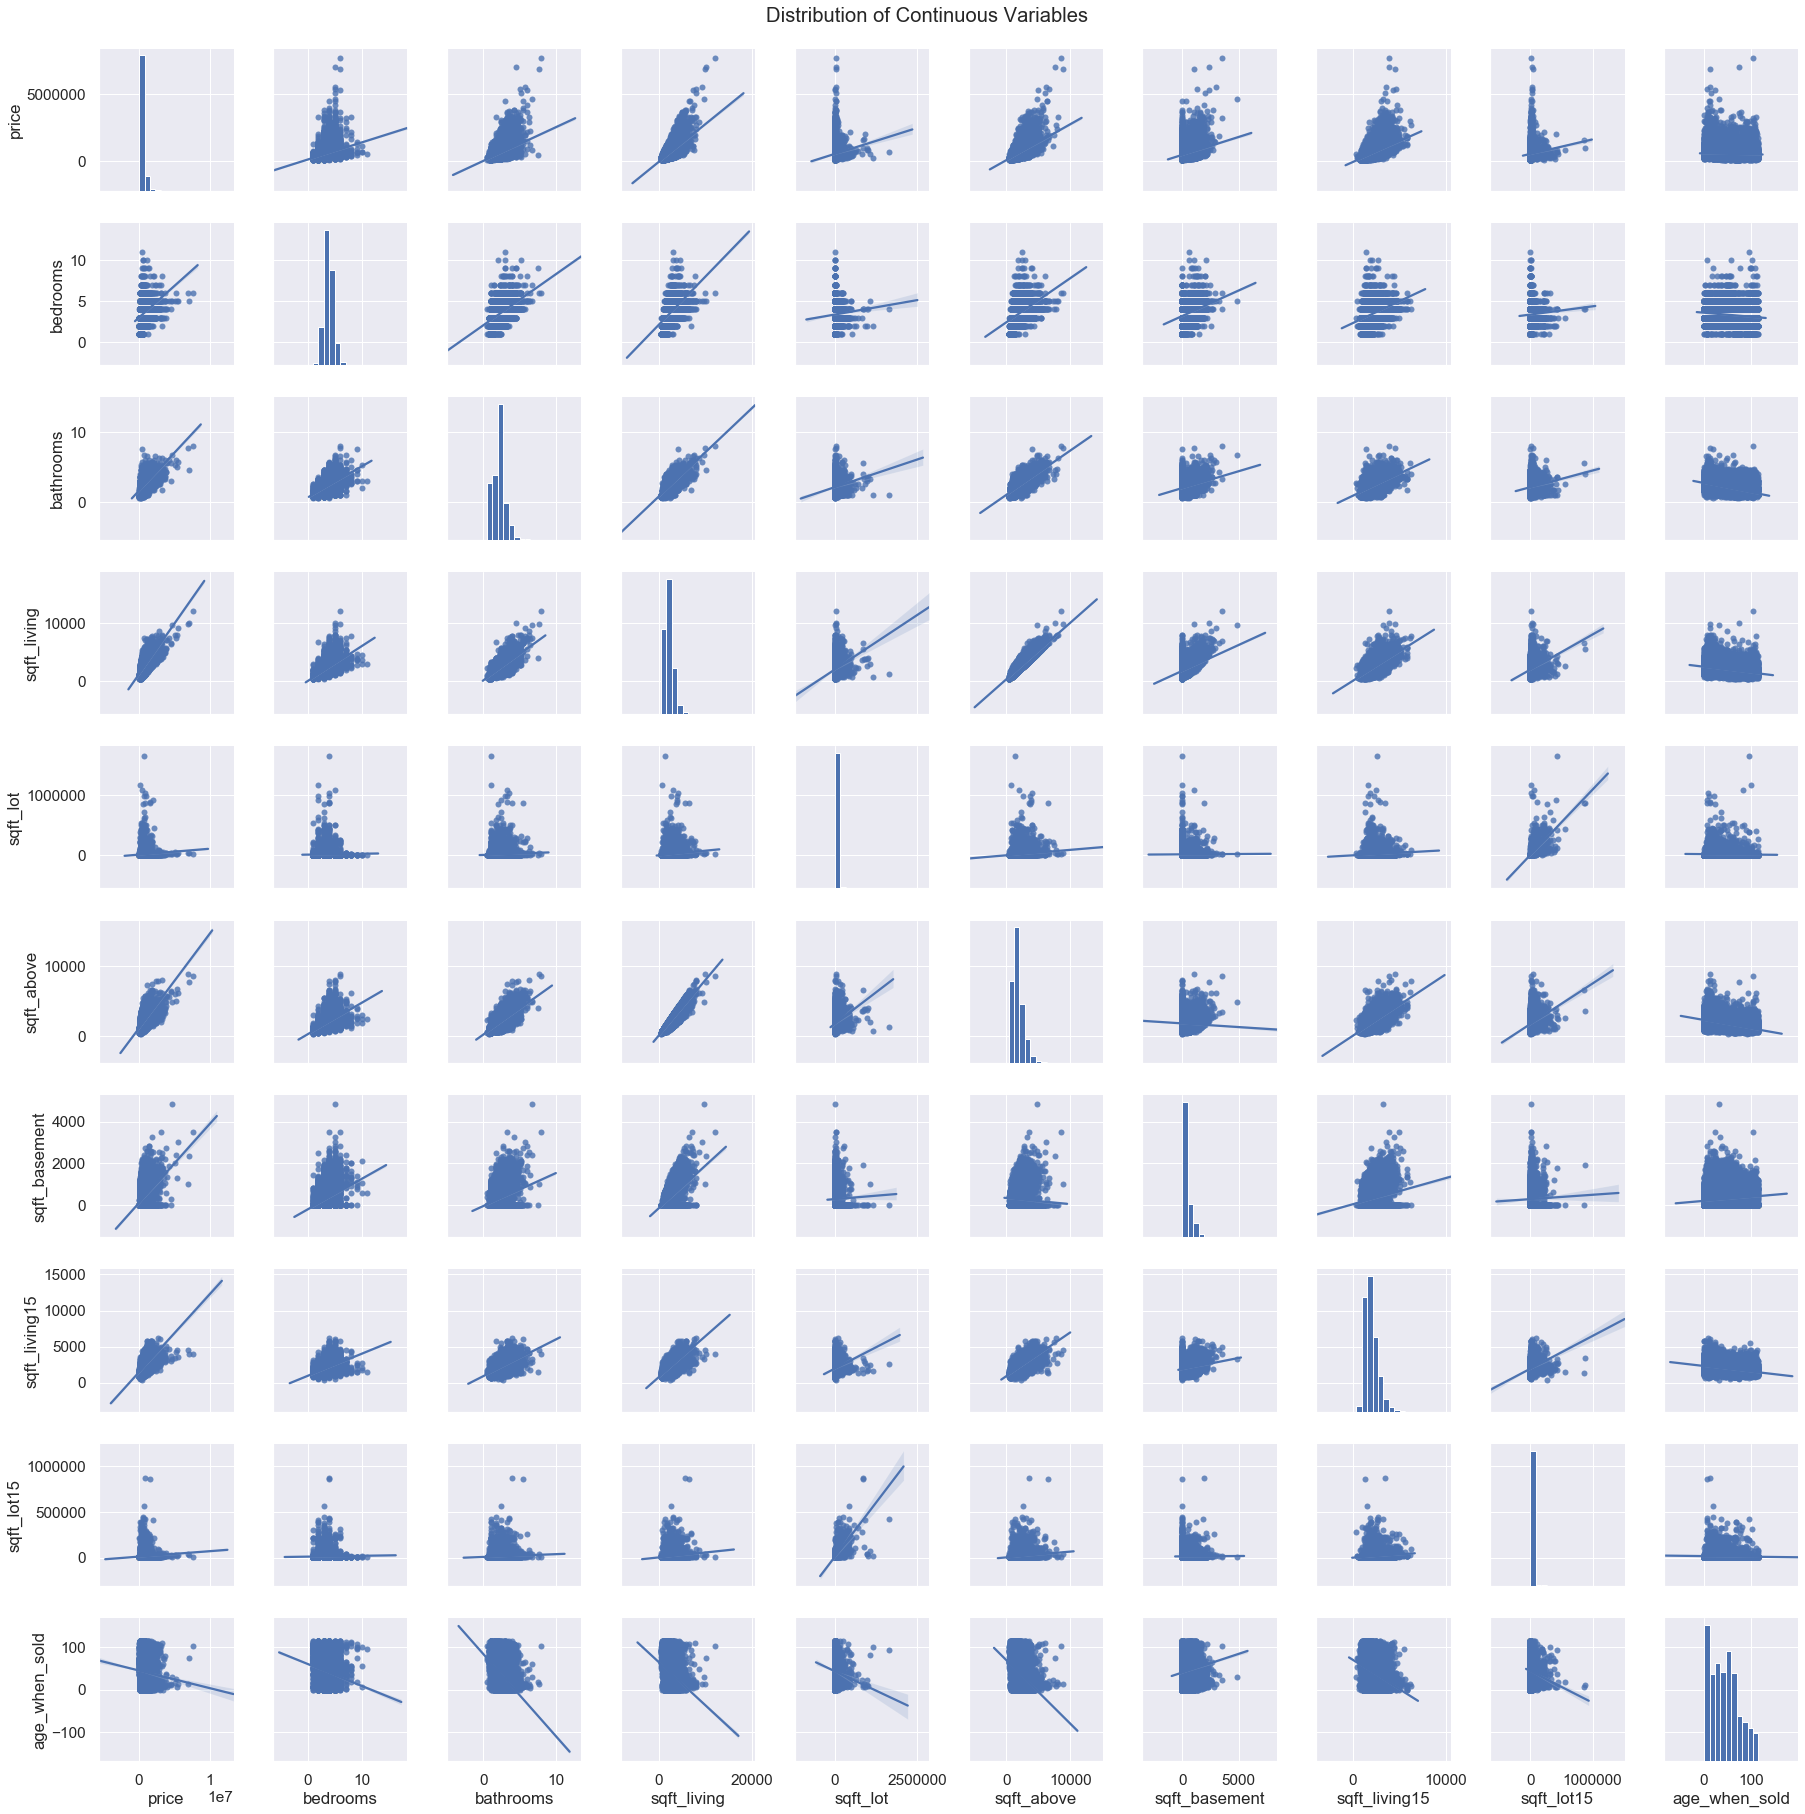

In [39]:
sns.set(font_scale = 1.4)
ax = sns.pairplot(house_data_cleaned[continuous], kind="reg")
ax.fig.suptitle('Distribution of Continuous Variables', y = 1.01)
plt.show()

In [40]:
corr = house_data_cleaned[continuous].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,age_when_sold
price,1,0.32,0.53,0.7,0.087,0.6,0.32,0.58,0.081,-0.053
bedrooms,0.32,1,0.53,0.59,0.032,0.49,0.3,0.41,0.03,-0.16
bathrooms,0.53,0.53,1,0.75,0.085,0.69,0.28,0.57,0.085,-0.51
sqft_living,0.7,0.59,0.75,1,0.17,0.88,0.43,0.76,0.18,-0.32
sqft_lot,0.087,0.032,0.085,0.17,1,0.18,0.012,0.14,0.72,-0.052
sqft_above,0.6,0.49,0.69,0.88,0.18,1,-0.056,0.73,0.19,-0.42
sqft_basement,0.32,0.3,0.28,0.43,0.012,-0.056,1,0.2,0.013,0.13
sqft_living15,0.58,0.41,0.57,0.76,0.14,0.73,0.2,1,0.18,-0.32
sqft_lot15,0.081,0.03,0.085,0.18,0.72,0.19,0.013,0.18,1,-0.07
age_when_sold,-0.053,-0.16,-0.51,-0.32,-0.052,-0.42,0.13,-0.32,-0.07,1


## Grade

We start by looking at a few variable of interest to answer our questions. First, we look at grade and evaluate the average price and number of transaction associated with each property grade.

In [41]:
average_price_per_grade = []
for grade in range(4,14):
    average_price_per_grade.append(house_data_cleaned['price'].loc[house_data_cleaned['grade'] == grade].mean())
average_price_per_grade

[212001.85185185185,
 247495.5170940171,
 301623.5709273183,
 402020.8747749775,
 542928.023837113,
 773299.7892514395,
 1072022.5911504424,
 1498861.5126262626,
 2213160.9195402297,
 3710769.230769231]

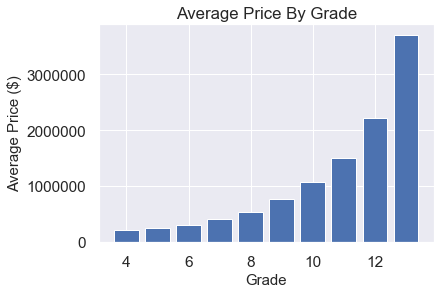

In [42]:
x = list(range(4,14))
y = average_price_per_grade
plt.bar(x, y)
plt.xlabel('Grade', fontsize=15)
plt.ylabel('Average Price ($)', fontsize=15)
plt.title('Average Price By Grade')
plt.show()

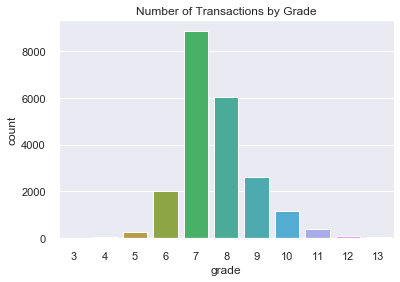

In [43]:
sns.set(style="darkgrid")
ax = sns.countplot(x="grade", data=house_data_cleaned).set_title('Number of Transactions by Grade')

As shown in the bar chart of Average Price per Grade, we can see gradual increase from grade 4 to 8 and exponential growth in house prices begin from grade 8 to grade 13. This is verified by the bar chart of Number of Transactions by Grade, as **grade 7 is the best-selling property grade** as it boasts **8888 sales** in the dataset, followed by grade 8 property, which have been sold 6041 times. This is explained by the little price difference between grade 7 properties and properties with grade 3-6, providing buyer to purchase an average grade of real estate at a relatively low price. The number of transaction decreases sharply by grade from grade 7 onwards as the the average price per property increases significantly each grade.

## Most Popular Price Range

This section aims to better understand the spending behavior of the consumer in the housing market, by observing the distribution of transaction in different price ranges.

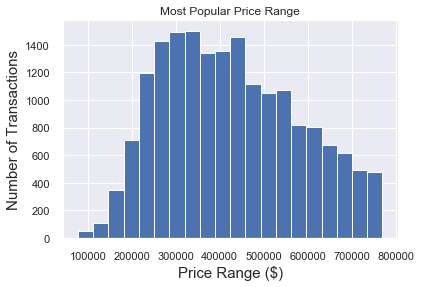

In [44]:
plt.hist(x= house_data_cleaned['price'], bins = 20, range=(78000,770000))
plt.xlabel('Price Range ($)', fontsize=15)
plt.ylabel('Number of Transactions', fontsize=15)
plt.title('Most Popular Price Range')
plt.show()

We can observe a fairly normally distributed histogram, with the most transaction occuring in the range from 250,000 to 450,000 dollar.

## Renovated vs Non-Renovated

Moving on, we will calculate the average price of non-renovated properties and renovated properties to determine the average premium of having a property renovated

In [45]:
average_cost_renovated = round(house_data_cleaned['price'].loc[house_data_cleaned['renovated_bool'] == 1.0].mean(),2)
average_cost_non_renovated = round(house_data_cleaned['price'].loc[house_data_cleaned['renovated_bool'] == 0.0].mean(),2)

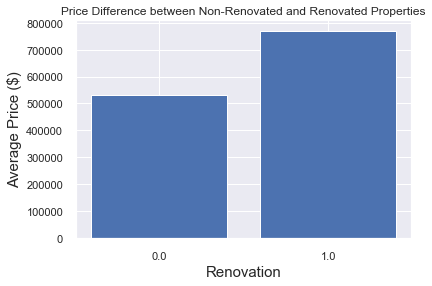

The average price before renovation is $ 532405.76 and the average price after renovation is $ 770595.15, the difference in price is $ 238189.38


In [46]:
x1 = ['0.0','1.0']
y1 = house_data_cleaned.groupby('renovated_bool').mean()['price']
plt.bar(x1, y1)
plt.xlabel('Renovation', fontsize=15)
plt.ylabel('Average Price ($)', fontsize=15)
plt.title('Price Difference between Non-Renovated and Renovated Properties')
plt.show()

avg_price_diff_reno = round(y1[1] - y1[0],2)
print("The average price before renovation is $ {} and the average price after renovation is $ {}, \
the difference in price is $ {}".format(round(y1[0],2), round(y1[1],2), avg_price_diff_reno))

## Transaction Per Month

In [47]:
house_data_cleaned.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'waterfront_bool', 'view_cleaned', 'renovated_bool',
       'age_when_sold', 'month_of_sale'],
      dtype='object')

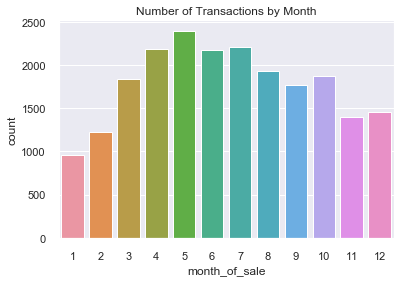

In [48]:
sns.set(style="darkgrid")
ax = sns.countplot(x="month_of_sale", data=house_data_cleaned).set_title('Number of Transactions by Month')

This bar chart shows the distribution of transaction by month of the year, indicating the spring season from April to July as the best time to sell properties.

## Transaction & Average Price by Age of House

In this analysis, we aim to compare the demand and premium of a house based on the age of the house. As shown in the histogram below, we can see a steady decline in number of transaction as the property ages, a sharp decline occurs after 70 years from year built.

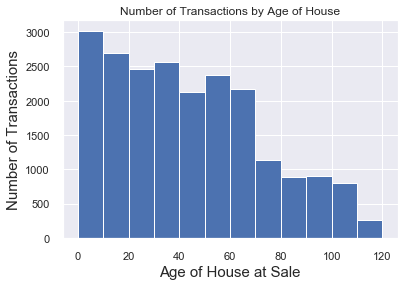

In [49]:
plt.hist(x= house_data_cleaned['age_when_sold'], bins = 12, range=(0,120))
plt.xlabel('Age of House at Sale', fontsize=15)
plt.ylabel('Number of Transactions', fontsize=15)
plt.title('Number of Transactions by Age of House')
plt.show()

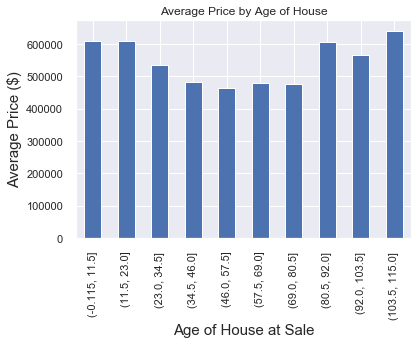

In [50]:
house_data_cleaned['binned_age'] = pd.cut(house_data_cleaned.age_when_sold, 10)
t = house_data_cleaned.groupby('binned_age')['price'].mean()
t.plot(kind = 'bar')
plt.xlabel('Age of House at Sale', fontsize=15)
plt.ylabel('Average Price ($)', fontsize=15)
plt.title('Average Price by Age of House')
plt.show()

## Top 5 Indicators of House Price

Let's revisit the correlation matrix created earlier:

In [51]:
corr = house_data_cleaned.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront_bool,view_cleaned,renovated_bool,age_when_sold,month_of_sale
id,1,-0.018,0.0021,0.0048,-0.013,-0.13,0.018,-0.024,0.0067,-0.011,-0.0045,0.021,-0.0079,-0.0026,0.019,-0.0036,-0.14,-0.0036,0.011,-0.011,-0.021,-0.011
price,-0.018,1,0.32,0.53,0.7,0.087,0.26,0.035,0.67,0.6,0.32,0.053,-0.052,0.31,0.021,0.58,0.081,0.27,0.39,0.12,-0.053,-0.011
bedrooms,0.0021,0.32,1,0.53,0.59,0.032,0.18,0.023,0.37,0.49,0.3,0.16,-0.16,-0.013,0.14,0.41,0.03,-0.0021,0.08,0.018,-0.16,0.0004
bathrooms,0.0048,0.53,0.53,1,0.75,0.085,0.5,-0.13,0.67,0.69,0.28,0.51,-0.2,0.023,0.22,0.57,0.085,0.064,0.18,0.047,-0.51,0.0057
sqft_living,-0.013,0.7,0.59,0.75,1,0.17,0.35,-0.062,0.76,0.88,0.43,0.32,-0.2,0.05,0.24,0.76,0.18,0.11,0.28,0.051,-0.32,0.011
sqft_lot,-0.13,0.087,0.032,0.085,0.17,1,-0.0068,-0.0093,0.11,0.18,0.012,0.052,-0.13,-0.087,0.23,0.14,0.72,0.022,0.074,0.0052,-0.052,-0.0032
floors,0.018,0.26,0.18,0.5,0.35,-0.0068,1,-0.27,0.46,0.52,-0.24,0.49,-0.058,0.049,0.12,0.28,-0.012,0.021,0.027,0.0031,-0.49,0.012
condition,-0.024,0.035,0.023,-0.13,-0.062,-0.0093,-0.27,1,-0.15,-0.16,0.17,-0.37,0.0043,-0.016,-0.11,-0.095,-0.0033,0.017,0.045,-0.056,0.36,0.022
grade,0.0067,0.67,0.37,0.67,0.76,0.11,0.46,-0.15,1,0.76,0.16,0.45,-0.18,0.11,0.2,0.71,0.12,0.083,0.25,0.015,-0.45,0.0058
sqft_above,-0.011,0.6,0.49,0.69,0.88,0.18,0.52,-0.16,0.76,1,-0.056,0.42,-0.26,-0.0025,0.34,0.73,0.19,0.072,0.16,0.02,-0.42,0.0081


In [52]:
x = corr['price'].sort_values(ascending = False)
top5_price_correlation = x[1:6]
top5 = top5_price_correlation.index
top5_price_correlation

sqft_living      0.702036
grade            0.667761
sqft_above       0.604777
sqft_living15    0.584171
bathrooms        0.525535
Name: price, dtype: float64

We can see that the top 5 variables with the highest correlation to price are **sqft_living, grade, sqft_above, sqft_living15** and  **bathrooms**. We will proceed to checking the linearity and distribution of the price and the 5 independent variables.

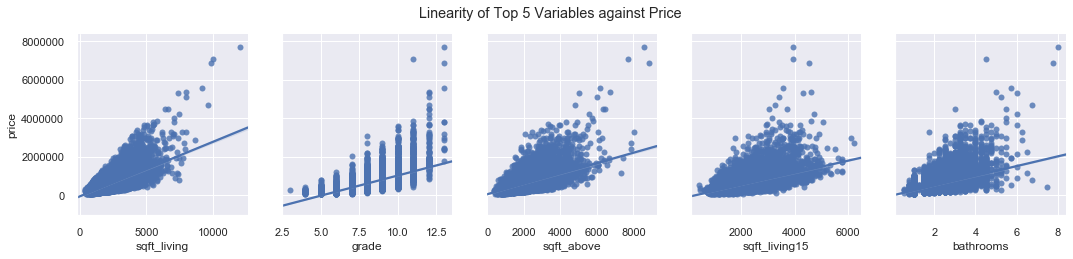

In [53]:
ax = sns.pairplot(data = house_data_cleaned, y_vars=['price'], x_vars = top5, kind='reg')
ax.fig.suptitle('Linearity of Top 5 Variables against Price', y = 1)
ax.fig.set_size_inches(15,4)
plt.show()

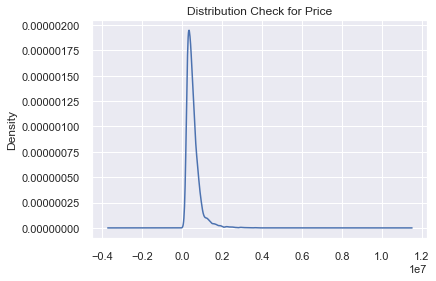

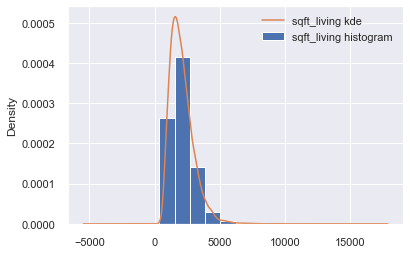

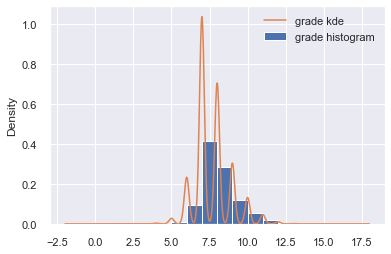

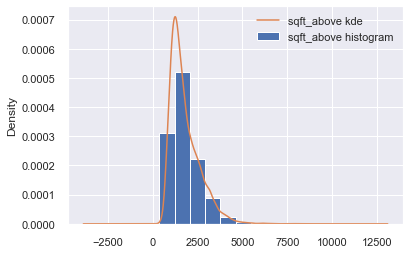

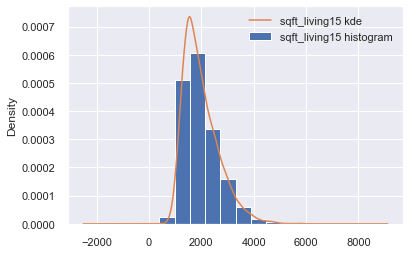

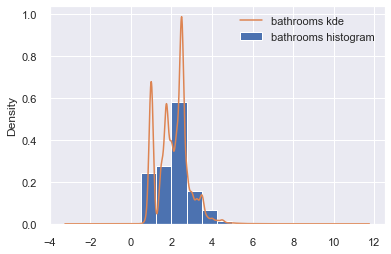

In [54]:
# Check for normal distribution
house_data_cleaned['price'].plot.kde()
plt.title("Distribution Check for Price")
plt.show()

for column in top5:
    house_data_cleaned[column].plot.hist(density=True, label = column+' histogram')
    house_data_cleaned[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

We can see reasonably clear trend of linearity in all 5 independent variables against price. Furthermore, looking at the distribution graph:
1. **price**: The dependent variable displays normal distribution
2. **grade**: Normal distribution is visible from histogram plot but spiky kde trendline is shown, but is explained by the nature of the variable
3. **sqft_living**: Slight positive skewness shown in histogram but kde trendline shows reasonable normal distribution
4. **sqft_above**: The positive skewness is visibly more severe than sqft_living but still within reasonable range
5. **sqft_living15**: The distribution chart shows similar result to sqft_above
6. **bathrooms**: Normal distribution is visible from histogram plot but spiky kde trendline is shown, but is explained by the nature of the variable

After checking the variables, we will run simple OLS regression analysis on the 5 variables as shown below:

In [55]:
f1 = 'price~sqft_living'
f2 = 'price~grade'
f3 = 'price~sqft_above'
f4 = 'price~sqft_living15'
f5 = 'price~bathrooms'

In [56]:
# sqft_living
model_sqft_living = ols(formula=f1, data=house_data_cleaned).fit()
model_sqft_living.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.081e+04
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        10:35:10   Log-Likelihood:            -2.9758e+05
No. Observations:               21417   AIC:                         5.952e+05
Df Residuals:                   21415   BIC:                         5.952e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.668e+04   4447.153    -10.497      0.000   -5.54e+04    -3.8e+04
sqft_living   282.0186      1.955    144.262      0.000     278.187     285.850
==============================================================================
Omnibus:                    14663.686   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           532395.147
Skew:                           2.819   Prob(JB):                         0.00
Kurtosis:                      26.766   Cond. No.                     5.65e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### sqft_living
* R-squared value: 0.493. 
* Coefficient: A unit increase in sqft_living is associated with a $ 281.07 increase in price
* p-value of 0.000 shows that the variable is statistically significant
* Warning code suggests possibility of multicollinearity, which we will assess later

In [57]:
# sqft_grade
model_grade = ols(formula=f2, data=house_data_cleaned).fit()
model_grade.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.723e+04
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        10:35:10   Log-Likelihood:            -2.9853e+05
No. Observations:               21417   AIC:                         5.971e+05
Df Residuals:                   21415   BIC:                         5.971e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.065e+06   1.24e+04    -86.085      0.000   -1.09e+06   -1.04e+06
grade       2.096e+05   1596.614    131.277      0.000    2.06e+05    2.13e+05
==============================================================================
Omnibus:                    19740.461   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2033949.365
Skew:                           4.090   Prob(JB):                         0.00
Kurtosis:                      50.036   Cond. No.                         52.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### grade
* R-squared value: 0.446. 
* Coefficient: A unit increase in grade is associated with a $ 209,700 increase in price
* p-value of 0.000 shows that the variable is statistically significant

In [58]:
# sqft_above
model_sqft_above = ols(formula=f3, data=house_data_cleaned).fit()
model_sqft_above.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                 1.235e+04
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        10:35:11   Log-Likelihood:            -2.9998e+05
No. Observations:               21417   AIC:                         6.000e+05
Df Residuals:                   21415   BIC:                         6.000e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.904e+04   4773.519     12.367      0.000    4.97e+04    6.84e+04
sqft_above   268.9360      2.420    111.128      0.000     264.193     273.679
==============================================================================
Omnibus:                    16368.497   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           723103.888
Skew:                           3.269   Prob(JB):                         0.00
Kurtosis:                      30.705   Cond. No.                     4.70e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### sqft_above
* R-squared value: 0.366. 
* Coefficient: A unit increase in sqft_above is associated with a $ 268.78 increase in price
* p-value of 0.000 shows that the variable is statistically significant
* Warning code suggests possibility of multicollinearity, which we will assess later

In [59]:
# sqft_living15
model_sqft_living15 = ols(formula=f4, data=house_data_cleaned).fit()
model_sqft_living15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.109e+04
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        10:35:11   Log-Likelihood:            -3.0038e+05
No. Observations:               21417   AIC:                         6.008e+05
Df Residuals:                   21415   BIC:                         6.008e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8.268e+04   6259.517    -13.209      0.000   -9.49e+04   -7.04e+04
sqft_living15   313.5010      2.976    105.327      0.000     307.667     319.335
==============================================================================
Omnibus:                    20000.416   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1897816.331
Skew:                           4.216   Prob(JB):                         0.00
Kurtosis:                      48.339   Cond. No.                     6.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### sqft_living15
* R-squared value: 0.342. 
* Coefficient: A unit increase in sqft_living15 is associated with a $ 313.74 increase in price
* p-value of 0.000 shows that the variable is statistically significant
* Warning code suggests possibility of multicollinearity, which we will assess later

In [60]:
# bathrooms
model_bathrooms = ols(formula=f5, data=house_data_cleaned).fit()
model_bathrooms.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     8171.
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        10:35:11   Log-Likelihood:            -3.0139e+05
No. Observations:               21417   AIC:                         6.028e+05
Df Residuals:                   21415   BIC:                         6.028e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7401.4120   6274.389      1.180      0.238   -4896.859    1.97e+04
bathrooms   2.517e+05   2784.925     90.396      0.000    2.46e+05    2.57e+05
==============================================================================
Omnibus:                    17121.197   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           877166.034
Skew:                           3.456   Prob(JB):                         0.00
Kurtosis:                      33.581   Cond. No.                         7.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### bathrooms
* R-squared value: 0.277, very low 
* Coefficient: A unit increase in bathrooms is associated with a $ 251,900 increase in price
* p-value of 0.253 shown for the intercept

So from our simple OLS linear regression analysis, we have obtained fairly poor result in terms of R-squared values:
- sqft_living = 0.493
- grade = 0.446
- sqft_above = 0.366
- sqft_living15 = 0.342
- bathrooms = 0.277

We will try to improve these results by using a multiple variable linear regression model.

## Multiple Variable Linear Regression Model

We begin the multiple linear regression model by including the relevant features of the property and remove unwanted data like id, month_of_sale, latitude, longitude, yr_built and zipcode. We then remove variable with high p value as they are statistically insignificant to the model.

In [61]:
outcome = 'price'
high_p_value = ['id', 'sqft_lot', 'month_of_sale', 'lat', 'long', 'yr_built', 'zipcode']
unwanted = [outcome] + high_p_value
variables = corr.drop(unwanted, axis=1)
pred_sum = "+".join(variables.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=house_data_cleaned).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     2909.
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        10:35:11   Log-Likelihood:            -2.9344e+05
No. Observations:               21417   AIC:                         5.869e+05
Df Residuals:                   21402   BIC:                         5.870e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -9.982e+05   1.75e+04    -56.885      0.000   -1.03e+06   -9.64e+05
bedrooms        -4.417e+04   2132.757    -20.709      0.000   -4.83e+04      -4e+04
bathrooms        4.816e+04   3520.062     13.681      0.000    4.13e+04    5.51e+04
sqft_living       115.7526     19.393      5.969      0.000      77.741     153.764
floors            2.73e+04   3793.889      7.196      0.000    1.99e+04    3.47e+04
condition        2.066e+04   2505.877      8.246      0.000    1.58e+04    2.56e+04
grade            1.201e+05   2269.881     52.931      0.000    1.16e+05    1.25e+05
sqft_above         48.2036     19.355      2.490      0.013      10.266      86.141
sqft_basement      55.7599     19.212      2.902      0.004      18.103      93.417
sqft_living15      23.6700      3.609      6.559      0.000      16.597      30.743
sqft_lot15         -0.5605      0.056    -10.001      0.000      -0.670      -0.451
waterfront_bool  6.097e+05   1.95e+04     31.323      0.000    5.72e+05    6.48e+05
view_cleaned     4.354e+04   2258.757     19.277      0.000    3.91e+04     4.8e+04
renovated_bool   2.778e+04   8525.699      3.259      0.001    1.11e+04    4.45e+04
age_when_sold    3591.5770     70.558     50.903      0.000    3453.278    3729.876
==============================================================================
Omnibus:                    16043.097   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1137910.932
Skew:                           2.998   Prob(JB):                         0.00
Kurtosis:                      38.202   Cond. No.                     3.99e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

After filtering the first round of independent variables, we obtained an R-squared value of 0.655, however the condition number is large, hench we conduct a test to check for multicollinearity between the independent variables.

In [62]:
# Check for multicollinearity
wanted = ['sqft_living15', 'bathrooms', 'grade', 'sqft_above',
          'sqft_living','bedrooms','condition','floors',
          'sqft_basement','sqft_lot15','waterfront_bool',
          'view_cleaned','renovated_bool','age_when_sold']
corr_wanted = house_data_cleaned[wanted].corr()
corr_wanted.style.background_gradient(cmap='coolwarm').set_precision(2)

,sqft_living15,bathrooms,grade,sqft_above,sqft_living,bedrooms,condition,floors,sqft_basement,sqft_lot15,waterfront_bool,view_cleaned,renovated_bool,age_when_sold
sqft_living15,1,0.57,0.71,0.73,0.76,0.41,-0.095,0.28,0.2,0.18,0.084,0.28,0.0008,-0.32
bathrooms,0.57,1,0.67,0.69,0.75,0.53,-0.13,0.5,0.28,0.085,0.064,0.18,0.047,-0.51
grade,0.71,0.67,1,0.76,0.76,0.37,-0.15,0.46,0.16,0.12,0.083,0.25,0.015,-0.45
sqft_above,0.73,0.69,0.76,1,0.88,0.49,-0.16,0.52,-0.056,0.19,0.072,0.16,0.02,-0.42
sqft_living,0.76,0.75,0.76,0.88,1,0.59,-0.062,0.35,0.43,0.18,0.11,0.28,0.051,-0.32
bedrooms,0.41,0.53,0.37,0.49,0.59,1,0.023,0.18,0.3,0.03,-0.0021,0.08,0.018,-0.16
condition,-0.095,-0.13,-0.15,-0.16,-0.062,0.023,1,-0.27,0.17,-0.0033,0.017,0.045,-0.056,0.36
floors,0.28,0.5,0.46,0.52,0.35,0.18,-0.27,1,-0.24,-0.012,0.021,0.027,0.0031,-0.49
sqft_basement,0.2,0.28,0.16,-0.056,0.43,0.3,0.17,-0.24,1,0.013,0.084,0.27,0.066,0.13
sqft_lot15,0.18,0.085,0.12,0.19,0.18,0.03,-0.0033,-0.012,0.013,1,0.031,0.072,0.0045,-0.07


We will set the threshold for multicollinearity at 0.6 between variables, therefore we will remove the following variables:
- sqft_living15
- bathrooms
- grade
- sqft_above

We will keep sqft_living as it contributed the most to the R-squared value and explained more variance than other variables.

In [68]:
outcome = 'price'
high_p_value = ['id', 'sqft_lot', 'month_of_sale', 'lat', 'long', 'yr_built', 'zipcode']
multicol = ['sqft_living15', 'bathrooms', 'grade', 'sqft_above']
unwanted = [outcome] + high_p_value + multicol
variables = corr.drop(unwanted, axis=1)
pred_sum = "+".join(variables.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=house_data_cleaned).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     3172.
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:19:16   Log-Likelihood:            -2.9512e+05
No. Observations:               21417   AIC:                         5.903e+05
Df Residuals:                   21406   BIC:                         5.903e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -2.07e+05   1.23e+04    -16.815      0.000   -2.31e+05   -1.83e+05
bedrooms        -5.637e+04   2236.295    -25.208      0.000   -6.08e+04    -5.2e+04
sqft_living       315.0027      2.773    113.584      0.000     309.567     320.439
floors           6.476e+04   3848.112     16.829      0.000    5.72e+04    7.23e+04
condition        2.274e+04   2702.435      8.416      0.000    1.74e+04     2.8e+04
sqft_basement     -22.7548      4.680     -4.862      0.000     -31.928     -13.582
sqft_lot15         -0.7363      0.060    -12.188      0.000      -0.855      -0.618
waterfront_bool  5.697e+05    2.1e+04     27.094      0.000    5.28e+05    6.11e+05
view_cleaned     6.242e+04   2399.585     26.012      0.000    5.77e+04    6.71e+04
renovated_bool   5.026e+04   9143.138      5.497      0.000    3.23e+04    6.82e+04
age_when_sold    2381.6447     69.599     34.220      0.000    2245.226    2518.063
==============================================================================
Omnibus:                    12836.204   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           444418.598
Skew:                           2.319   Prob(JB):                         0.00
Kurtosis:                      24.829   Cond. No.                     3.98e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

After removing the variables with multicolllinearity, we have scaled down our regression model to 10 independent variables and produced a model with R-squared of 0.597. This is a significant improvement from the simple regression model by sqft_living, which has an R-squared value of 0.493

## Significance of a Waterfront View

As evident from the regression results above, we noticed waterfront_bool possessed the highest coefficient value at 569700, indicating the addition of a waterfront view could theoretically add an average of 569,700 dollar to the property. We will investigate further by visualizing the regression line of properties with and without waterfront view.

Text(48.14211063888892, 0.5, 'price ($)')

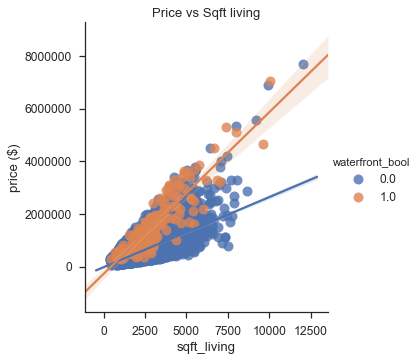

In [67]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('sqft_living', # Horizontal axis
           'price', # Vertical axis
           data=house_data_cleaned, # Data source
           hue = "waterfront_bool",
           fit_reg=True, # Don't fix a regression line
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) 

# Set title
plt.title('Price vs Sqft living')

# Set x-axis label
plt.xlabel('sqft_living')

# Set y-axis label
plt.ylabel('price ($)')

For this visualization we used price against sqft_living, as sqft_living has the highest correlation with price. The result is significant as the properties with waterfront produces a regression line with higher gradient compared to properties with no waterfront. The average price difference is more obvious as the square foot of living space increases.

## PLEASE IGNORE THE BOTTOM CODE

In [ ]:
## To test the regression model

print(-2.07e+05 +\
-5.637e+04 * bedrooms +\
315.0027 * sqft_living +\
6.476e+04 * floors +\
2.274e+04 * condition +\
-22.7548 * sqft_basement +\
-0.7363 * sqft_lot15 +\
5.697e+05 * waterfront_bool +\
5.026e+04 * renovated_bool +\
2381.6447 * age_when_sold)